## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

## Loading Data Set

In [2]:
# Read the data file correctly
df = pd.read_csv(r"E:\Pugc\6th semester\Aritficial Intelligence\ex1data1.txt", delimiter=',', header=None)

# Assign column names
df.columns = ['Population', 'Profit']

# Extract x and y data
x_train = df['Population'].values
y_train = df['Profit'].values

# Verify the loaded data
print(df.head())  # Ensure the data matches the example from the PDF

   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


View the variables

In [3]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [4]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


Check the dimensions of your variables

In [5]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


Visualize your data

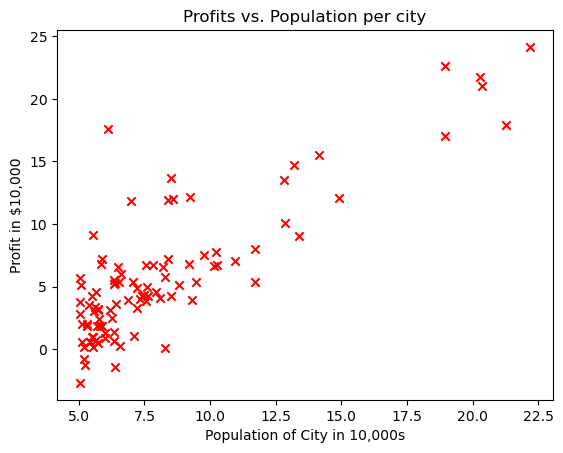

In [6]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

## Computer Cost

In [7]:
# UNQ_C1
# GRADED FUNCTION: compute_cost
def compute_cost(x, y, w, b):
 
 # number of training examples
 m = x.shape[0]

 # You need to return this variable correctly
 total_cost = 0

 ### START CODE HERE ###

 yp = np.zeros(m)
 yp = np.dot(x, w) + b
 total_cost = (1 / (2 * m)) * np.sum((yp-y)**2)

 ### END CODE HERE ###
 return total_cost

In [8]:
initial_w = 2
initial_b = 1
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')
# Public tests

#from public_tests import *
#compute_cost_test(compute_cost)


<class 'numpy.float64'>
Cost at initial w: 75.203


## Compute Gradient Descent

In [9]:
def compute_gradient(x, y, w, b):
 # Number of training examples
 m = x.shape[0]

 # You need to return the following variables correctly
 dj_dw = 0
 dj_db = 0

 ### START CODE HERE ###

 yp = np.zeros(m)
 yp = np.dot(x, w) + b
 dj_db = (1 / m) * np.sum(yp-y)
 dj_dw = (1 / m) * np.sum((yp-y)*x)

 ### END CODE HERE ###

 return dj_dw, dj_db


In [10]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546392


In [11]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392


In [12]:
def compute_gradient(x, y, w, b):

 # Number of training examples
 m = x.shape[0]

 # You need to return the following variables correctly
 dj_dw = 0
 dj_db = 0

 ### START CODE HERE ###

 yp = np.zeros(m)
 yp = np.dot(x, w) + b
 dj_db = (1 / m) * np.sum(yp-y)
 dj_dw = (1 / m) * np.sum((yp-y)*x)

 ### END CODE HERE ###

 return dj_dw, dj_db

In [13]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546392


In [14]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392


In [15]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # number of training examples
 m = len(x)

 # An array to store cost J and w's at each iteration — primarily for graphing later
 J_history = []
 w_history = []
 w = copy.deepcopy(w_in) #avoid modifying global w within function
 b = b_in

 for i in range(num_iters):
 # Calculate the gradient and update the parameters
  dj_dw, dj_db = gradient_function(x, y, w, b )
 # Update Parameters using w, b, alpha and gradient
  w = w - alpha * dj_dw
  b = b - alpha * dj_db
 # Save cost J at each iteration
  if i<100000: # prevent resource exhaustion
    cost = cost_function(x, y, w, b)
    J_history.append(cost)
 # Print cost every at intervals 10 times or as many iterations if < 10
  if i% math.ceil(num_iters/10) == 0:
    w_history.append(w)
    print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")

 return w, b, J_history, w_history #return w and J,w history for graphin

In [16]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.
# some gradient descent settings
iterations = 1500
alpha = 0.01
w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74 
Iteration  150: Cost     5.31 
Iteration  300: Cost     4.96 
Iteration  450: Cost     4.76 
Iteration  600: Cost     4.64 
Iteration  750: Cost     4.57 
Iteration  900: Cost     4.53 
Iteration 1050: Cost     4.51 
Iteration 1200: Cost     4.50 
Iteration 1350: Cost     4.49 
w,b found by gradient descent: 1.166362350335582 -3.6302914394043597


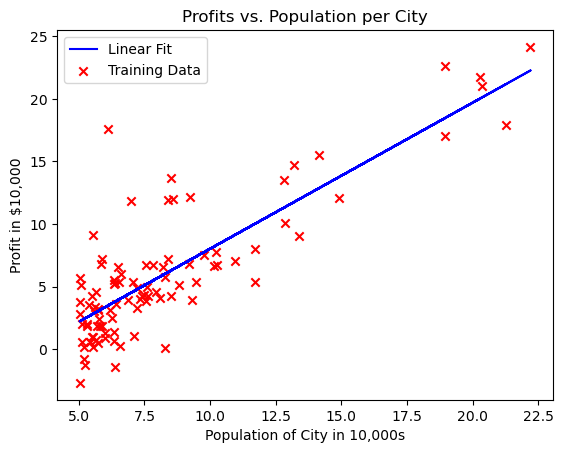

In [17]:
# Assuming x_train and y_train are your data points, and w, b are your fitted parameters
m = x_train.shape[0]
predicted = np.zeros(m)

# Calculate the predicted values based on the fitted line
for i in range(m):
    predicted[i] = w * x_train[i] + b

# Plot the linear fit
plt.plot(x_train, predicted, color='b', label='Linear Fit')

# Create a scatter plot of the original data
plt.scatter(x_train, y_train, marker='x', color='r', label='Training Data')

# Set the title and labels
plt.title("Profits vs. Population per City")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')

# Add a legend
plt.legend()

# Display the plot
plt.show()


Predicted Values

In [18]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))
predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
